# **Task**
### - **Assignment 3-1**<br>
  **Plot the regression curves over the training data for visual inspection:**

  Generate plots of the regression model fitted on the training data to visually inspect the fit.<br>
  Compare how well the model captures the underlying patterns of the data.<br>
  Plot training and testing errors across different polynomial degrees to select the optimal complexity of the model:<br>
  
  Plot the training and testing errors as a function of the polynomial degree.<br>Use these plots to identify the point where the model balances bias and variance, helping to select the optimal model complexity.<br>
  Evaluate model accuracy and tune hyperparameters using Randomized Grid Search:
<br>
  Apply different evaluation metrics (such as Mean Squared Error, R², MAE, etc.) to assess the model's performance on both the training and test sets.
  Use Randomized Grid Search to explore a range of hyperparameters efficiently and find the best configuration for your model.
  Present the results of the best hyperparameters along with the evaluation metrics to demonstrate the improvements in the model's accuracy.
<br><br>
### - **Assignment 3-2**<br>
  **Extend the cost function to include L1 (Lasso) and L2 (Ridge) penalties.<br>
  Analyze the impact of regularization on model performance across different lambda values.**

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Libraries
import pandas as pd # for dataframe
import numpy as np # for arrays
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting(kind of *heatmap* from confusion matrix)

# Sklearn Libraries
# from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, confusion_matrix, roc_curve, accuracy_score, precision_score, recall_score, f1_score

## **Section 1:**
###a. Plot a feature vs label graph for both the training data and the test data.
###b. Write a code to fit a curve that minimizes the squared error cost function using gradient descent (with learning rate 0.05) on the training set.

### **Look into Data**

In [ ]:
# Understanding the data and simple curve fitting

# Load Data
train_df = pd.read_csv('/content/drive/MyDrive/24-2/Major/MachineLearning_LiliaTightiz/Assignments/Assignment3/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/24-2/Major/MachineLearning_LiliaTightiz/Assignments/Assignment3/test.csv')

In [ ]:
train_df.head()

,Feature,Label
0,0.963585,-0.229634
1,0.715377,-0.979414
2,0.896298,-0.608057
3,0.049025,0.306430
4,0.299481,0.952607


In [ ]:
test_df.head()

,Feature,Label
0,0.355414,0.785368
1,0.451334,0.302000
2,0.127785,0.718821
3,0.734916,-0.990279
4,0.445669,0.333141


In [ ]:
# Check for Columns
print(train_df.columns)
print(test_df.columns)

Index(['Feature', ' Label'], dtype='object')
Index(['Feature', ' Label'], dtype='object')


In [ ]:
# Info
print(train_df.info)
print("======================")
print(test_df.info)

<bound method DataFrame.info of       Feature     Label
0    0.963585 -0.229634
1    0.715377 -0.979414
2    0.896298 -0.608057
3    0.049025  0.306430
4    0.299481  0.952607
..        ...       ...
995  0.196550  0.943661
996  0.068852  0.417877
997  0.786102 -0.971872
998  0.050846  0.310817
999  0.429965  0.428704

[1000 rows x 2 columns]>
<bound method DataFrame.info of       Feature     Label
0    0.355414  0.785368
1    0.451334  0.302000
2    0.127785  0.718821
3    0.734916 -0.990279
4    0.445669  0.333141
..        ...       ...
195  0.181268  0.906174
196  0.881642 -0.675052
197  0.621949 -0.697610
198  0.109905  0.632176
199  0.192497  0.934545

[200 rows x 2 columns]>


In [ ]:
train_df.shape

(1000, 2)

In [ ]:
test_df.shape

(200, 2)

* train_df: 1000*2
* test_df: 200*2

In [ ]:
# Check for null data in csv file
print(train_df.isnull().sum())
print("==============")
print(test_df.isnull().sum())

Feature    0
 Label     0
dtype: int64
Feature    0
 Label     0
dtype: int64


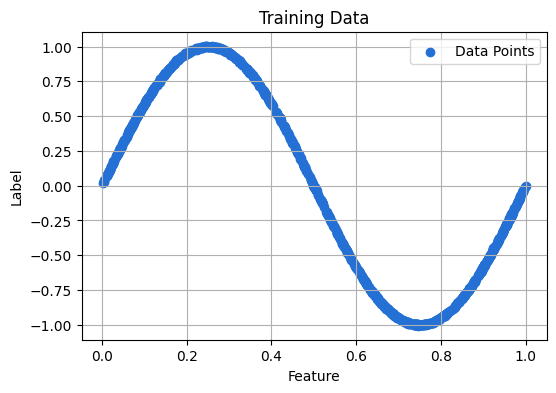

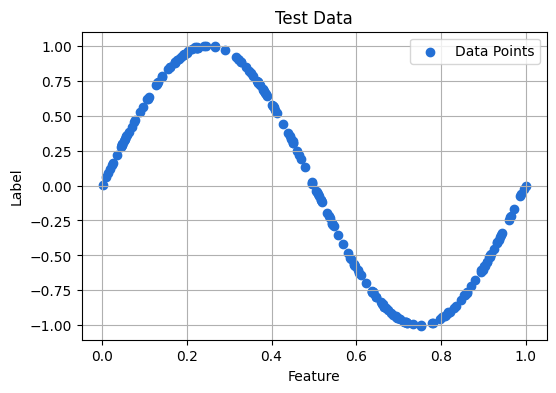

In [ ]:
# Plot a feature vs label graph for both(train, test)
def plot_data(data, title):
  plt.figure(figsize = (6, 4))
  plt.scatter(data['Feature'], data[' Label'], c='#2470d5', label='Data Points') # c: color of scatters/ label: legend of graph
  plt.title(title)
  plt.xlabel('Feature')
  plt.ylabel('Label')
  plt.legend()
  plt.grid(True) # Set Grid
  plt.show()

# Plotting Training Data
plot_data(train_df, 'Training Data')

# Plotting Test Data
plot_data(test_df, 'Test Data')

→ Both are *Sinusoidal* relationship

For Both,
- X-Axis: ranging from 0 to 1
- Y-Axis: ranging from -1 to 1

However, since amount of *'test data* is less than train data, scatter plot appears less continuous

### **Preparing for Training Model**

In [ ]:
# Define Polinominal Features
def polynomial_features(x, degree):
  return np.array([x**i for i in range(degree + 1)]).T

In [ ]:
# Cost Function
def compute_cost(X, y, weights):
  m = len(y)
  predictions = X.dot(weights)
  cost = (1/(2*m)) * np.sum(np.square(predictions - y))
  return cost

In [ ]:
# Gradient Function
def compute_gradient(X, y, weights):
  m = len(y)
  predictions = X.dot(weights)
  gradient = (1/m) * X.T.dot(predictions - y)
  return gradient

In [ ]:
# Gradient Descent
def gradient_descent(X, y, weights, learning_rates, iterations):
  # Perform GD to learn weights
  cost_history = []
  for i in range(iterations):
    weights = weights - learning_rates * compute_gradient(X, y, weights)
    cost = compute_cost(X, y, weights)
    cost_history.append(cost)
    if i%100 == 0: # Print cost every 100 iterations for tracking
      print(f"Iteration {i}: Cost {cost}")
  return weights, cost_history

### **Train the Model**

In [ ]:
# Hyperparameters
learning_rate = 0.05
iterations = 1000

# Storing the models
models = []
errors = []

for degree in range(1, 10): # Polynomial degrees from 1 to 9
  X_train = polynomial_features(train_df['Feature'], degree)
  y_train = train_df[' Label']

  # Initialize weights
  weights = np.random.rand(degree + 1) # 1 if for constant (Ex. In y=w0+w1x+w2x^2, w0 is 1)
  weights, cost_history = gradient_descent(X_train, y_train, weights, learning_rate, iterations)
  final_cost = compute_cost(X_train, y_train, weights)
  models.append(weights)
  errors.append(final_cost)
  print(f"Degree {degree}: Final Cost {final_cost}")

Iteration 0: Cost 0.5627000160027
Iteration 100: Cost 0.19798140328773178
Iteration 200: Cost 0.14905183644252437
Iteration 300: Cost 0.12447686647569849
Iteration 400: Cost 0.11213393299747128
Iteration 500: Cost 0.10593461690236403
Iteration 600: Cost 0.10282097134032249
Iteration 700: Cost 0.10125712324203431
Iteration 800: Cost 0.10047167068303588
Iteration 900: Cost 0.10007717218723411
Degree 1: Final Cost 0.09988041443094452
Iteration 0: Cost 0.4786266637884819
Iteration 100: Cost 0.16263015970094835
Iteration 200: Cost 0.12085937048065083
Iteration 300: Cost 0.10909124031428862
Iteration 400: Cost 0.1057027858286046
Iteration 500: Cost 0.10465668225444198
Iteration 600: Cost 0.1042672021008868
Iteration 700: Cost 0.10406361139698146
Iteration 800: Cost 0.10391441134719644
Iteration 900: Cost 0.10378282138147717
Degree 2: Final Cost 0.10365972784207743
Iteration 0: Cost 1.1954121135244344
Iteration 100: Cost 0.16418363639440983
Iteration 200: Cost 0.12748460388847796
Iteration 30

<Results\><br>
* Degree 1: Final Cost 0.01
* Degree 2: Final Cost 0.103
* Degree 3: Final Cost 0.102
* Degree 4: Final Cost 0.095<br>
...
* Degree 8: Final Cost 0.052
* Degree 9: Final Cost 0.056

→ The minimum Final Cost at *Degree 8*<br>
appears *Overfiiting* from Degree 9


In [ ]:
# Based on trained model above, predict the target value
def predict_polynomial(X, weights):
    X_poly = polynomial_features(X, len(weights) - 1)  # Matches to Degree
    return np.dot(X_poly, weights)

# Predict the Target value by Performing a dot product between the expanded features and the stored weights

In [ ]:
# For Test Data - Using Trained Weights from Training Phase
errors_t = []

for degree in range(1, 10):  # Use the same degrees as training
    X_test = polynomial_features(test_df['Feature'], degree)
    y_test = test_df[' Label']

    # Use the trained weights from the training data
    weights = models[degree - 1]
    # <The reason why use *degree - 1*>
    # In Training Phase,we initialize the weights with a random range of 'degree+1', becuase we need weights for all polynomial terms, including the constant term.
    # Thus, we use 'models[degree-1]' as a weight, to utilize weights that trained above process(to evaluate)
    final_cost_t = compute_cost(X_test, y_test, weights)
    errors_t.append(final_cost_t)
    print(f"Degree {degree}: Final Test Cost {final_cost_t}")

Degree 1: Final Test Cost 0.09535073746714531
Degree 2: Final Test Cost 0.09762991968707194
Degree 3: Final Test Cost 0.1007327776633428
Degree 4: Final Test Cost 0.08650154550373294
Degree 5: Final Test Cost 0.07904315238091471
Degree 6: Final Test Cost 0.06824610915567886
Degree 7: Final Test Cost 0.06718465550763245
Degree 8: Final Test Cost 0.05941493075476876
Degree 9: Final Test Cost 0.054432340459973645


**Evaluation**

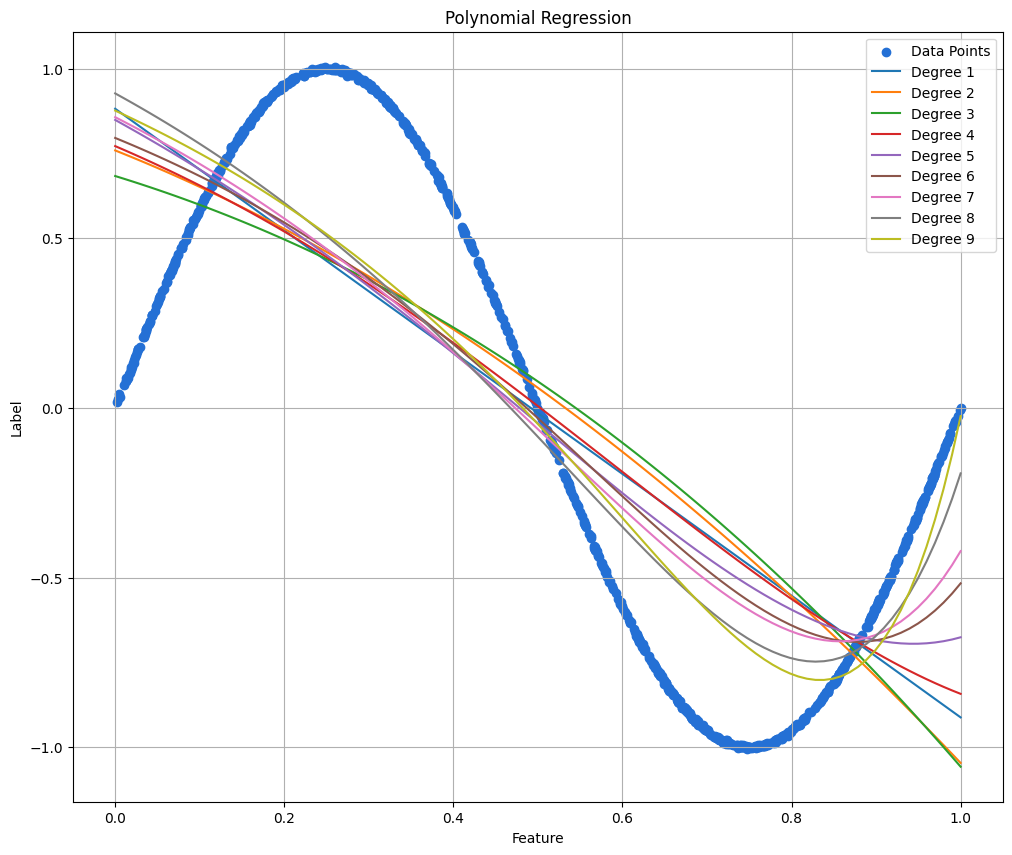

In [ ]:
# Visualize Regression Curve

def plot_polynomial_regression(data, models, degrees):
    plt.figure(figsize=(12, 10))

    # Original Data
    plt.scatter(data['Feature'], data[' Label'], c='#2470d5', label='Data Points')

    # Set range of Feature value
    x_range = np.linspace(0, 1, 100)

    for degree in degrees:
      y_pred = predict_polynomial(x_range, models[degree-1])
      plt.plot(x_range, y_pred, label=f'Degree {degree}')

    plt.title(f'Polynomial Regression')
    plt.xlabel('Feature')
    plt.ylabel('Label')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_polynomial_regression(train_df, models, degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9])

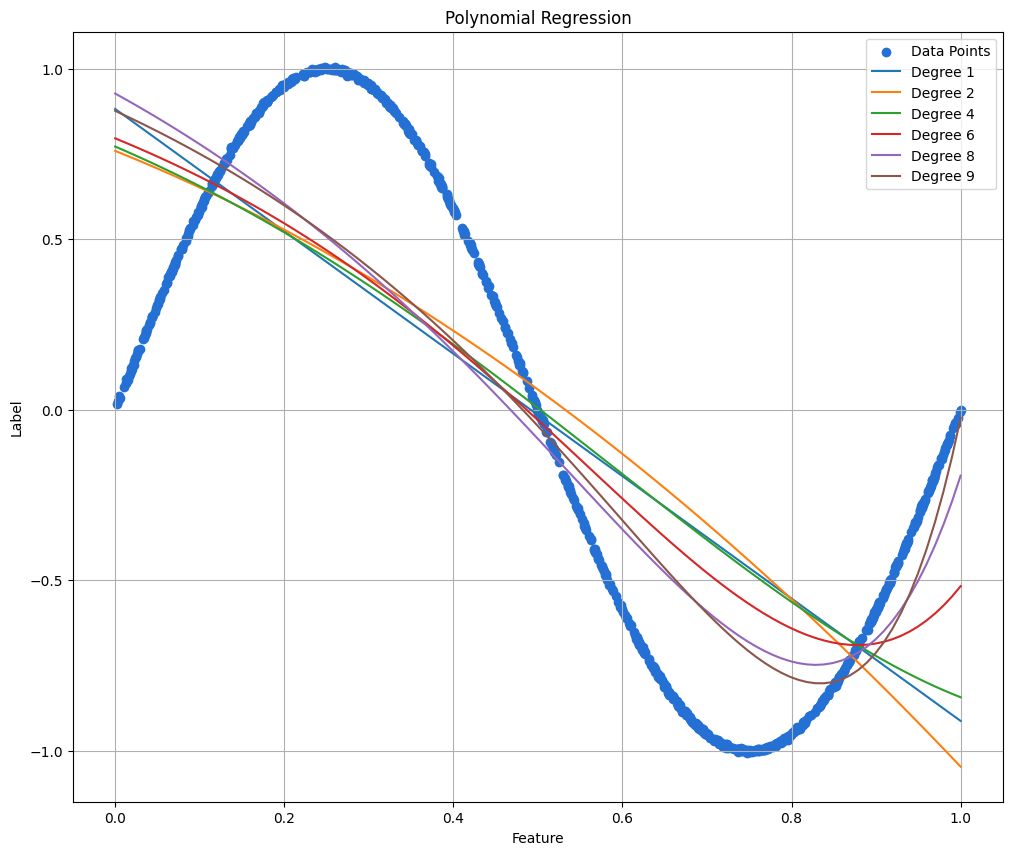

In [ ]:
plot_polynomial_regression(train_df, models, degrees = [1, 2, 4, 6, 8, 9])

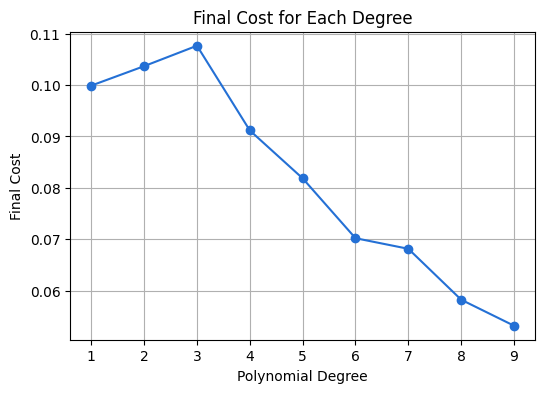

In [ ]:
# Plot for each Final Cost
def cost_plot(data, title):
  plt.figure(figsize=(6, 4)) # Set for size of Plot
  degrees = list(range(1, len(data)+1)) # Polynomial Degree starts from 1
  plt.plot(degrees, data, marker='o', linestyle='-', color='#2470d5') # (X_Axis(degrees), y_Axis(data), ...)
  plt.title(title)
  plt.xlabel('Polynomial Degree')
  plt.ylabel('Final Cost')
  plt.grid(True)
  plt.show()

cost_plot(errors, 'Final Cost for Each Degree')

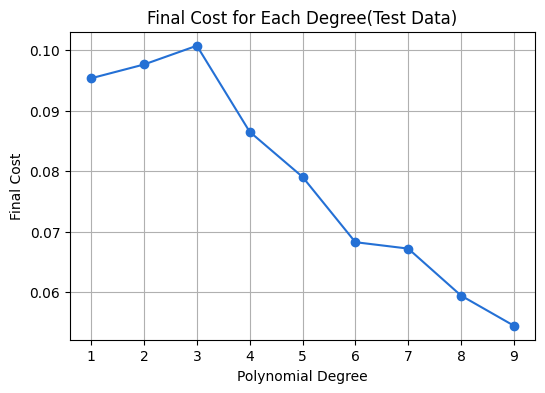

In [ ]:
cost_plot(errors_t, 'Final Cost for Each Degree(Test Data)')

→ Appears the minimum point of Final cost at Degree 8

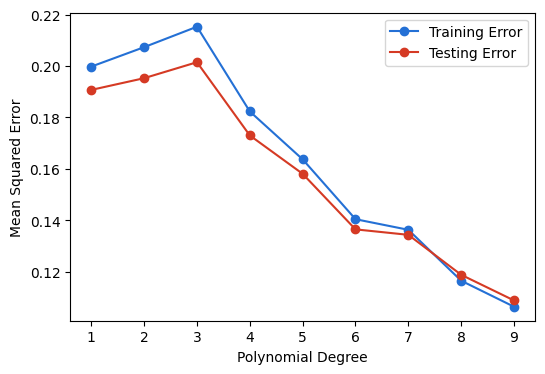

In [ ]:
def plot_train_test_errors(train_data, test_data, models, max):
  errors = []
  errors_t = []

  # Calculating Errors
  for degree in range(1, max+1):
    X_poly = polynomial_features(train_data['Feature'], degree)
    X_poly_t = polynomial_features(test_data['Feature'], degree)

    y_pred = predict_polynomial(train_data['Feature'], models[degree-1])
    y_pred_t = predict_polynomial(test_data['Feature'], models[degree-1])

    # MSE
    mse = np.mean((train_data[' Label'] - y_pred)**2)
    mse_t = np.mean((test_data[' Label'] - y_pred_t)**2)
    errors.append(mse)
    errors_t.append(mse_t)

    # R^2

    # MAE

  # Plotting
  plt.figure(figsize=(6, 4))
  plt.plot(range(1, max+1), errors, marker='o', linestyle='-', color='#2470d5', label='Training Error')
  plt.plot(range(1, max+1), errors_t, marker='o', linestyle='-', color='#d53a24', label='Testing Error')
  plt.xlabel('Polynomial Degree')
  plt.ylabel('Mean Squared Error')
  plt.legend()
  plt.show()

plot_train_test_errors(train_df, test_df, models, degree)

### **What is MSE used for?**
***MSE(Mean Squared Error)***
Mean Value of Squared error<br>
Thus, less MSE means better algorithm performance

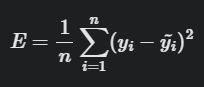

In [ ]:
# Grid Search

from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

threshold = 0
y_train_classified = [1 if val > threshold else 0 for val in y_train]

param_distributions = {
    'C': [0.001, 0.05, 0.04, 0.015, 0.01, 0.1],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Logistic
logistic = LogisticRegression()

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=logistic,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    verbose = 2,
    random_state = 42,
    n_jobs = -1)

# Train
random_search.fit(X_train, y_train_classified)

# Best Parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.04}


Fitting 5 folds for each of 10 candidates, totalling 50 fits<br>
Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.04}

## **Section 2:**
### Write code about L1(Lasso) and L2(Ridge) and Study what are they used for

**L1(Lasso) and L2(Ridge)**

**What does Regularization need for?**

More Data can resolve *Overfitting*. <br>However, There is a limit to the data that can be processed.

*How to fit a relatively complex and flexible model using a limited number of data sets?*
→ **Regularization**

The lasso and ridge regression coefficient reduction methods do not necessarily reduce useless variables, <br>
but simply resolve multicollinearity.

---

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

### **L1(Lasso)**<br>
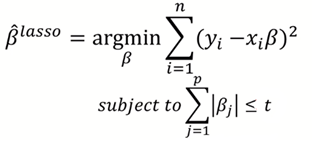


In [ ]:
l1 = Lasso(alpha=0.001)
l1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.680e-01, tolerance: 5.068e-02
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001)

In [ ]:
# Regression coefficient
l1.coef_

array([ 0.        ,  4.1099765 , -9.90436798, -0.        ,  0.        ,
        2.33467027,  3.45461961,  0.        ,  0.        ,  0.        ])

0.01<br>
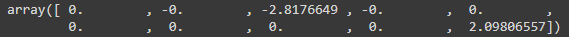

0.001<br>
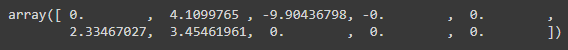

In [ ]:
from sklearn.metrics import mean_squared_error

# Predict on the training set
y_train_pred = l1.predict(X_train)

# Calculate the cost (mean squared error)
cost = mean_squared_error(y_train, y_train_pred)

# Print the cost and final cost with L1
print("Cost:", cost)
print("Final Cost (L1):", cost)

Cost: 0.025475154889691473
Final Cost (L1): 0.025475154889691473


### **L2(Ridge)**
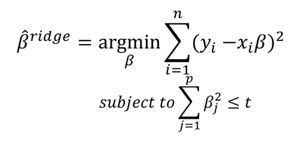

In [ ]:
l2 = Ridge(alpha = 0.04)
l2.fit(X_train, y_train)

Ridge(alpha=0.04)

In [ ]:
# Regression Coefficient
l2.coef_

array([  0.        ,   6.41281282, -12.30307713,  -5.11902747,
         2.65146777,   5.95840946,   5.52124804,   2.83345868,
        -0.94230583,  -5.06670752])

0.01<br>
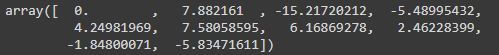

0.04<br>
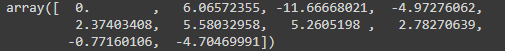

0.001<br>
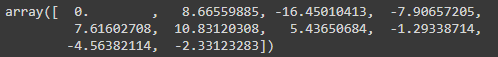

In [ ]:
# Predict on the training set
y_train_pred = l2.predict(X_train)

# Calculate the cost (mean squared error)
cost = mean_squared_error(y_train, y_train_pred)

# Print the cost and final cost with L2
print("Cost:", cost)
print("Final Cost (L2):", cost)

Cost: 0.004695579844385749
Final Cost (L1): 0.004695579844385749


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge  # Ridge for L2 regularization

# 모델 정의
model = Ridge(alpha=0.001)  # alpha 값은 원하는 대로 설정

# 교차 검증 (예: 5-Fold 교차 검증)
scores = cross_val_score(model, X_train, y_train, cv=5)

# 각 Fold에서의 성능 출력 및 평균 성능 계산
print("Cross-Validation Scores:", scores)
print("Average CV Score:", scores.mean())

Cross-Validation Scores: [0.99894337 0.99893785 0.99885451 0.99885622 0.99900807]
Average CV Score: 0.9989200033972885


-> I've also tried Cross Validation(K-fold)<br>
While coefficient result, 0.01 performed better average cv score

<br>
I've search and study more about this.
Since I was curious which parameter(alpha) is more trustworthy.
<hr>

###[Reason]<br>
If Researcher wants<br>
- **Better Performance:** 0.01(or which one that higher CV score)
- **Model Interpretability and better Generalization Performance:** 0.04(or which one has more stable coeffcient)

In [ ]:
import numpy as np

np.random.seed(0)
X = np.random.rand(100, 2) # Sampling
y = X @ np.array([3, 5]) + np.random.randn(100) * 0.5  # y = 3x1 + 5x2 + noise

# Initializing Parameters
theta = np.random.rand(2) # To fixfor all trial
lambda_l1 = 0.04
lambda_l2 = 0.04

# Cost function that including L1, L2 Normalization
def compute_cost(X, y, theta, lambda_l1, lambda_l2):
    m = len(y)
    predictions = X @ theta  # Prediction
    errors = predictions - y  # Errors

    cost = (1 / (2 * m)) * np.sum(errors ** 2)  # MSE

    l1_penalty = lambda_l1 * np.sum(np.abs(theta))
    l2_penalty = (lambda_l2 / 2) * np.sum(theta ** 2)

    total_cost = cost + l1_penalty + l2_penalty
    return total_cost

# Output
cost = compute_cost(X, y, theta, lambda_l1, lambda_l2)
print(f"Total cost with L1 and L2 regularization: {cost:.4f}")

Total cost with L1 and L2 regularization: 7.7843
